# Test HamiltonianFlow

Based on https://github.com/jnafzig/HamiltonianSolver , https://www.tensorflow.org/tutorials/non-ml/pdes

In [1]:
import tensorflow as tf
import numpy as np
import time
tfe=tf.contrib.eager
import sys
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("../")

In [2]:
from utils import join_q_p, extract_q_p
from models import HamiltonianFlow, MLPHamiltonian

In [3]:
sess = tf.InteractiveSession()
#tf.enable_eager_execution()

In [4]:
# Suppress the warning till they fix this:
# lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: 
# DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
import warnings
warnings.filterwarnings("ignore")

In [5]:
#tf.reset_default_graph()

In [6]:
def oscillator_hamiltonian(qq,pp):        
    # After split, q,p are of shape [N,1]
    return 0.5 * ( pp[:,0]**2 + qq[:,0]**2 )

## Test oscillator case, forward and inverse

In [7]:
sz = (1,1,1,2)
q0 = 0.1232
p0 = 2.2211
x0_np = np.reshape(np.hstack((q0,p0)), sz)

m=HamiltonianFlow(oscillator_hamiltonian, sz)
sess.run(tf.global_variables_initializer())

In [8]:
print(x0_np)
y0=m(x0_np)
y0_np=y0.eval()
print(y0_np)
# Expected:
# [[0.1232 2.2211]]
# [[-1.3116971 -1.7966397]]

[[[[0.1232 2.2211]]]]
[[[[-1.3116971 -1.7966397]]]]


In [9]:
y0_inv=m.inverse(y0_np)
y0_inv_np=y0_inv.eval()
print(y0_inv_np)

[[[[0.12320016 2.2210996 ]]]]


In [10]:
# Check that the final time after inverse is indeed 0
sess.run(m.t)

-0.00013357401

In [11]:
# Check that no trainable vars since oscillator Hamiltonian
m.trainable_variables

[]

## Test full state

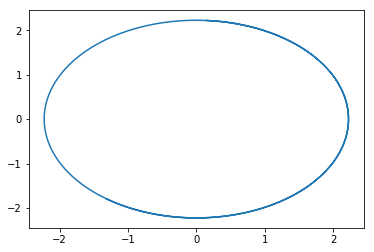

In [12]:
state=m(x0_np,return_full_state=True)
plt.plot(state[0,0,0,0,:],state[0,0,0,1,:])

## Test full state batch

In [13]:
batch = 20
sz = (batch,1,1,2)

x0_np = np.random.randn(*sz).astype(np.float32)

m=HamiltonianFlow(oscillator_hamiltonian, sz)
sess.run(tf.global_variables_initializer())

In [14]:
state=m(x0_np,return_full_state=True)

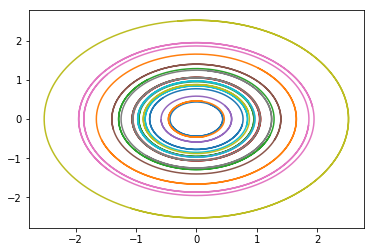

In [15]:
for b in range(batch):
    plt.plot( state[b,0,0,0,:],state[b,0,0,1,:] )

## Test nn Hamiltonian

In [56]:
sz = (10,3,5,2)
x0_np = np.random.randn(*sz).astype(np.float32)

m=HamiltonianFlow( MLPHamiltonian() , sz )
sess.run(tf.global_variables_initializer())

In [57]:
y0=m(x0_np)
y0_np=y0.eval()
print(y0_np.shape)

(10, 3, 5, 2)


In [58]:
y0_inv=m.inverse(y0_np)
y0_inv_np=y0_inv.eval()
print(y0_inv_np.shape)

(10, 3, 5, 2)


In [59]:
np.where( np.abs(x0_np - y0_inv_np) > 0.000001 )

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [60]:
m.trainable_variables

[<tf.Variable 'mlp_hamiltonian_3_1/dense_5/kernel:0' shape=(30, 50) dtype=float32>,
 <tf.Variable 'mlp_hamiltonian_3_1/dense_5/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'mlp_hamiltonian_3_1/dense_6/kernel:0' shape=(50, 1) dtype=float32>,
 <tf.Variable 'mlp_hamiltonian_3_1/dense_6/bias:0' shape=(1,) dtype=float32>]

3x5x2 = 30 is the right shape of the kernel. 

Just a proof of principle that it works with batch - random curves

In [67]:
batch = 3
sz = (batch,1,1,2)

x0_np = np.random.randn(*sz).astype(np.float32)

m=HamiltonianFlow( MLPHamiltonian() , sz )
sess.run(tf.global_variables_initializer())

In [68]:
state=m(x0_np,return_full_state=True)

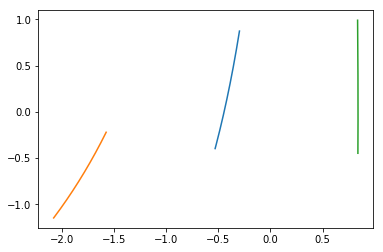

In [69]:
for b in range(batch):
    plt.plot( state[b,0,0,0,:],state[b,0,0,1,:] )